In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [56]:
df=pd.read_csv(r'C:\Users\user\Downloads\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [57]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [58]:
#Standardize the problem
from sklearn.preprocessing import StandardScaler

In [59]:
ss=StandardScaler()

In [60]:
ss.fit(df.drop('Type',axis=1))

StandardScaler()

In [61]:
#perform transformation
features=ss.transform(df.drop('Type',axis=1))
feature_frame=pd.DataFrame(features,columns=df.columns[:-1])
feature_frame

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


<AxesSubplot:>

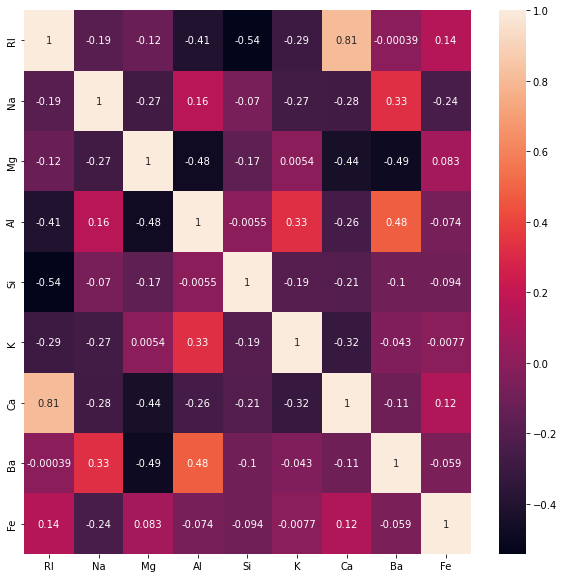

In [62]:
#finding the correlation among the features
plt.figure(figsize=(10,10))
sn.heatmap(feature_frame.iloc[:,0:].corr(),annot=True)


In [63]:
#Train and test Split
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(feature_frame,df['Type'],test_size=0.30)

In [65]:
#Implementing the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
pred=knn.predict(X_test)

In [69]:
#predictions andEvaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [70]:
print(confusion_matrix(y_test,pred))


[[20  5  1  0  0]
 [ 2 19  0  0  0]
 [ 5  2  2  0  0]
 [ 1  2  0  2  0]
 [ 1  0  0  0  3]]


In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73        26
           2       0.68      0.90      0.78        21
           3       0.67      0.22      0.33         9
           5       1.00      0.40      0.57         5
           7       1.00      0.75      0.86         4

    accuracy                           0.71        65
   macro avg       0.81      0.61      0.65        65
weighted avg       0.73      0.71      0.68        65



In [72]:
#Recognising the correct value of k
error_rate=[]
for i in range(1,70):
    kn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

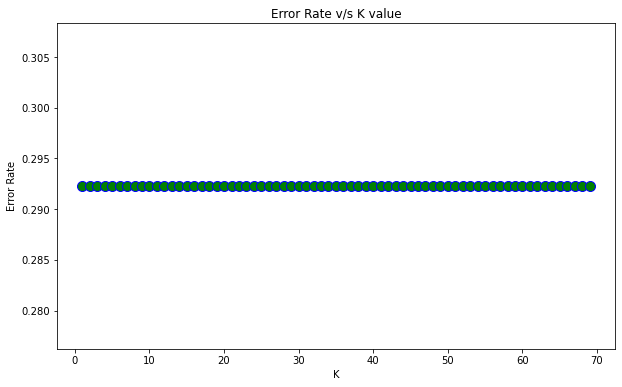

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',linestyle='solid',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [76]:
#finding the minimum error rate out of different K values
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[18  8  0  0  0]
 [ 3 18  0  0  0]
 [ 7  2  0  0  0]
 [ 0  5  0  0  0]
 [ 1  0  0  0  3]]


              precision    recall  f1-score   support

           1       0.62      0.69      0.65        26
           2       0.55      0.86      0.67        21
           3       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         5
           7       1.00      0.75      0.86         4

    accuracy                           0.60        65
   macro avg       0.43      0.46      0.44        65
weighted avg       0.49      0.60      0.53        65



E:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
